In [72]:
import os
print(os.environ["PYTHONPATH"])  # Should contain parent dirrectory of image_captioning module

/home/k/retail


In [86]:
import json

import pandas as pd
import numpy as np
import editdistance
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

import torch

import image_captioning.constants as C
from image_captioning.caption import caption_image_beam_search, visualize_att

In [87]:
with open("metrics.json") as f:
    metrics = json.load(f)
train_metrics = pd.DataFrame(metrics["train"])
train_metrics.columns = ["train_" + c for c in train_metrics.columns]
val_metrics = pd.DataFrame(metrics["val"])
val_metrics.columns = ["val_" + c for c in val_metrics.columns]
test_metrics = pd.DataFrame(metrics["test"])
test_metrics.columns = ["test_" + c for c in test_metrics.columns]
metrics = train_metrics.join(val_metrics).join(test_metrics)
metrics.head()

,train_error,train_losses,val_edit,val_error,val_losses,val_norm_edit,test_edit,test_error,test_losses,test_norm_edit
0,0.990972,3.398875,1.869258,0.976279,3.357171,0.580365,1.860539,0.980900,3.354579,0.579658
1,0.983333,2.979127,1.874205,0.976957,3.122779,0.582415,1.857567,0.980882,3.125999,0.579948
2,0.985069,2.868084,1.868551,0.982040,2.897016,0.580118,1.850358,0.980580,2.901443,0.577219
3,0.978819,2.864346,1.868551,0.979668,2.815186,0.580118,1.850138,0.981569,2.821916,0.577173
4,0.981944,2.846747,1.868551,0.978312,2.799205,0.580236,1.850028,0.981190,2.809049,0.577335


Text(0.5,0,'Epoch')

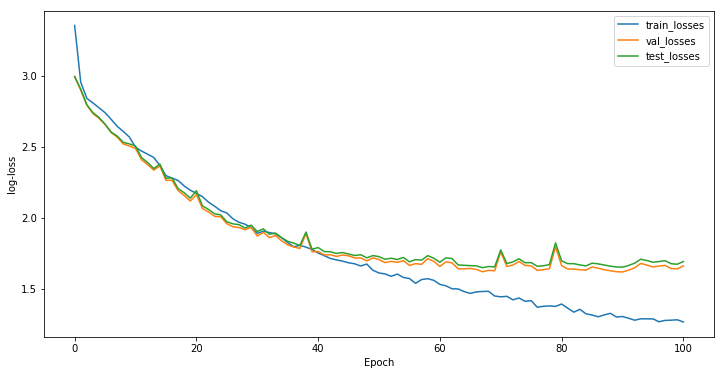

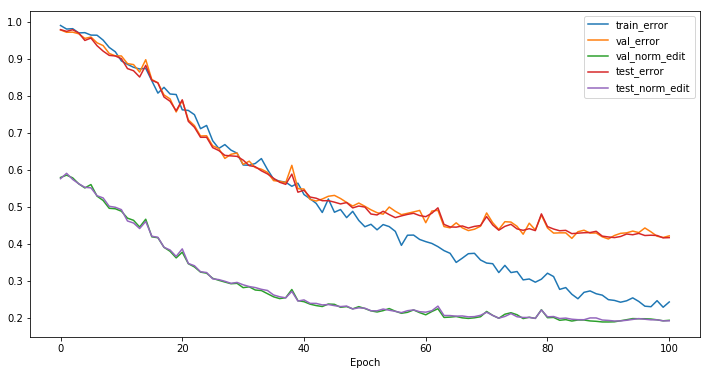

In [85]:
metrics[["train_losses", "val_losses", "test_losses"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("log-loss")
metrics[["train_error", "val_error", "val_norm_edit", "test_error", "test_norm_edit"]].plot(figsize=(12,6))
#plt.yscale("log")
plt.xlabel("Epoch")